In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors
from datetime import datetime
import random 
import time
from random import randint
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [0]:
userDatasetCsv = pd.read_csv('users_data.csv',sep=',')
userDatasetCsv.dropna()
#userDataset = userDataset.drop_duplicates(['username','hotel_name'])
hotelFullDataset = pd.read_csv('Hotels.csv',sep=',')
hotelFullDataset.dropna()
hotelFullDataset.drop_duplicates(subset ="name", keep = "first", inplace = True) 
#merge = pd.merge(hotelFullDataset,userDataset,right_on='hotel_name',left_on='name')
#merge = merge[merge.columns.difference(['name'])]
#print(merge[['hotel_name','username']].groupby(['hotel_name','username'])['hotel_name','username'].describe())
print(hotelFullDataset)

In [0]:
userDataset = userDatasetCsv
print(userDataset)

In [0]:
#hotelFullDataset['property_amenties'] = hotelFullDataset['property_amenties'].apply(lambda x: x.split(' '))

In [0]:
#list_of_properties = hotelFullDataset.property_amenties
#list_of_properties.values.tolist()

In [0]:
#list_of_unique_properties = []
#for list in list_of_properties:
#    for pr in list:
#        if pr not in list_of_unique_properties:
#            list_of_unique_properties.append(pr)
#print (list_of_unique_properties)

In [0]:
#def reOrdering_properties(original_list):
#    arr = []
#    for pr in list_of_unique_properties:
#        if pr in original_list :
#            arr.append(pr)
#        else:
#            arr.append('')
#    return arr

In [0]:
#hotelFullDataset['property_amenties'] = hotelFullDataset.property_amenties.apply(lambda hotel_row: reOrdering_properties(hotel_row))

In [0]:
#property_amen_df = pd.DataFrame()

In [0]:
#property_amen_df[list_of_unique_properties] = pd.DataFrame([x for x in hotelFullDataset.property_amenties])

In [0]:
#property_amen_df.head(5)

In [0]:
#property_amen_df = property_amen_df.applymap(lambda x: 1 if x != '' else 0)

In [0]:
#property_amen_df.head(5)

In [0]:
#print(property_amen_df.shape)
#print(hotelFullDataset.shape)

In [0]:
#ppties = []
#for i in range(len(list_of_unique_properties)):
#  if (property_amen_df[list_of_unique_properties[i]].sum() < 50 ):
#    if(list_of_unique_properties[i] not  in ppties and list_of_unique_properties[i]!='' ):
#      ppties.append(list_of_unique_properties[i])
#ppties

In [0]:
#hotelFullDataset['property_amenties'] = hotelFullDataset.property_amenties.apply(lambda hotel_row: reOrdering_properties(hotel_row))

In [0]:
#list_of_unique_properties = ppties


In [0]:
#hotelFullDataset = hotelFullDataset[hotelFullDataset.hotel_class.notnull()].reset_index()

In [0]:
#hotelFullDataset = pd.concat([hotelFullDataset, property_amen_df], axis=1)

In [0]:
#hotelFullDataset.shape

In [0]:
hotelFullDataset.hotel_class.isnull().sum()

In [468]:
hotelFullDataset.head(1)

,name,url,Country,Region,Street,Zip,location,property_amenties,room_features,hotel_style,hotel_class,price,hotel_score_reviews,totalReview,location_score,cleanliness_score,service_score,value_score
0,"Radisson Blu Royal Viking Hotel, Stockholm",https://www.tripadvisor.in/Hotel_Review-g18985...,Sweden,Sweden Stockholm Norrmalm,1 Vasagatan P.O. Box 234,111 20,"1 Vasagatan P.O. Box 234, Stockholm 111 20 Sweden",Parking Free_High_Speed_Internet_(WiFi) Pool F...,Air_conditioning Housekeeping Room_service Saf...,Business Centrally_Located,4.0,1643.0,4.0,481,4.5,4.5,4.0,4.0


In [0]:
#print(hotelFullDataset.columns)
merge = pd.merge(hotelFullDataset,userDataset,left_on='name',right_on='hotel_name')

#merge = merge[['hotel_class','price','location_score','cleanliness_score','service_score','value_score','score']]
hotelsFinalData = merge.iloc[:,10:]
hotelsFinalData.drop(['username','hotel_name'], axis=1, inplace=True)
print(hotelsFinalData.columns)


In [0]:
hotelsFinalData.sum()

In [0]:
_exeptScore = hotelsFinalData.columns.difference(['score'])
hotelsFinalData[_exeptScore]=((hotelsFinalData[_exeptScore]-hotelsFinalData[_exeptScore].min())/(hotelsFinalData[_exeptScore].max()-hotelsFinalData[_exeptScore].min()))*20

In [0]:
hotelsFinalData.sample(8)

In [0]:

hotelsFinalData = hotelsFinalData.dropna()
for column in hotelsFinalData.columns:
  print("correlation with : ",column)
  print(abs(hotelsFinalData['score'].corr(hotelsFinalData[column],method ='pearson')) * 100)

target_attribute = hotelsFinalData['score'].values

data = hotelsFinalData.drop(columns = ['score'], axis = 1).values
#target_attribute.reset_index()
#hotelsFinalData = hotelsFinalData.reset_index()

X_train, X_test, y_train, y_test = train_test_split(data, target_attribute, test_size=0.2)

In [0]:
def knn_model_quality():
  max = 0
  for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    if(max < accuracy):
      bestIndex = k
      max = accuracy
  print("best k : ",bestIndex," The accuracy of knn is {:.2f} : ".format(max))

In [0]:
def kmeans_model_quality():
  max = 0
  for k in range(1,20):
    kmeans = KMeans(n_clusters=k, max_iter=600, algorithm = 'auto')
    kmeans.fit(X_train, y_train)
    y_pred = kmeans.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    if(max < accuracy):
      bestIndex = k
      max = accuracy
  print("best k : ",bestIndex," The accuracy of kmeans is {:.2f} : ".format(max))

In [0]:
from sklearn.svm import SVC

def svm_quality():
  svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
  svm.fit(X_train, y_train)
  accuracy = cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')
  print('The accuracy of the svm classifier on test data is {:.2f}'.format(accuracy))


In [0]:
import xgboost as xgb
def xgboost_quality():
  xgb_clf = xgb.XGBClassifier()
  xgb_clf = xgb_clf.fit(X_train, y_train)
  print('The accuracy of the xgb classifier is {:.2f} '.format(xgb_clf.score(X_test, y_test)))

In [0]:
knn_model_quality()
kmeans_model_quality()
svm_quality()
xgboost_quality()

In [0]:
def knn_cross_validation():
  neighbors = [i for i in range(1,100)]
  cv_scores = []
  for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(1 - accuracy.mean())
  optimal_k = neighbors[cv_scores.index(min(cv_scores))]

  print("the best k is :",optimal_k," with error rate of : ",cv_scores[optimal_k - 1])
  # plot misclassification error vs k
  plt.plot(neighbors, cv_scores)
  plt.xlabel("Number of Neighbors K")
  plt.ylabel("Misclassification Error")
  plt.show()
  return optimal_k

In [0]:
best_k = knn_cross_validation()

In [0]:
def knn_model_quality_for_a_k(k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  #Predict the response for test dataset
  y_pred = knn.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("k : ",k," The accuracy of knn is : ",accuracy)

In [0]:
knn_model_quality_for_a_k(best_k)

In [0]:
def calculate_feature_significance():
  model = RandomForestClassifier()
  # fit the model
  model.fit(X_train, y_train)
  # get importance
  importance = model.feature_importances_
  # summarize feature importance
  for i,v in enumerate(importance):
    print("Feature : ",hotelsFinalData.columns[i]," has a significance of : %.5f" % v)
  print("\n")

[22:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature 0: hotel_class, Score: 0.08795
Feature 1: price, Score: 0.05427
Feature 2: hotel_score_reviews, Score: 0.28838
Feature 3: totalReview, Score: 0.06644
Feature 4: location_score, Score: 0.05394
Feature 5: cleanliness_score, Score: 0.30929
Feature 6: service_score, Score: 0.06360
Feature 7: value_score, Score: 0.07615


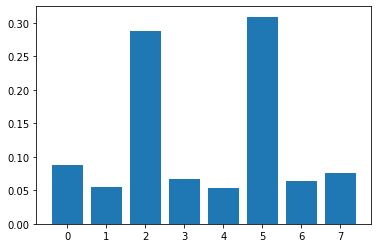

In [484]:

# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %0d: %0s, Score: %.5f' % (i,hotelsFinalData.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [0]:
calculate_feature_significance()

In [486]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [498]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
$

Accuracy: 75.38 %.
